# <span style="color:blue">Lab Case Study - Auto Insurance Company</span>

 #### Table of contents
 
 * [Import and concatenate files](#chapter1)
  
 * [Standardizing header names](#chapter2)
  
 * [Deleting rows](#chapter3)
 
 * [Check the data types](#chapter4)
  
 * [Filtering data and Correcting typos](#chapter5)
  
 * [Removing duplicates](#chapter6)
  
 * [Replacing null values](#chapter7)
  
     * [Customer lifetime value](#chapter7_1)
     * [Income](#chapter7_2)
     * [Monthly premium auto](#chapter7_3)
     * [Number of open complaints](#chapter7_4)
     * [Total claim amount](#chapter7_5)
      
 * [Bucketing the data](#chapter8)
  
 * [Standardizing the data](#chapter9)
  
 * [Data types - Numerical or Categorical?](#chapter10)
  
 * [New information on response and sales channel](#chapter11)
  
 * [Data Visualization](#chapter12)
  
    * [Plot of the total number of responses](#chapter12_1)
    * [Plot of the response rate by the sales channel](#chapter12_2)
    * [Plot of the response rate by the total claim amount](#chapter12_3)
    * [Plot of the response rate by the income](#chapter12_4)
    * [Heatmap](#chapter12_5)  
      
 * [Rechecking and sorting numerical and categorical data](#chapter13)
   
 * [Checking for normal distribution](#chapter14)
   
 * [Multicollinearity](#chapter15)
     * [ighly Correlated Columns](#chapter15_1)
 
 * [Data Transformation](#chapter16)
 
     * [Hot coding Categorical Variables](#chapter16_1)
     * [X Y split](#chapter16_2)
     * [Data Splitting](#chapter16_3)
 
 * [Standardize - using StandardScaler](#chapter17)
 
     * [Apply Linear Regression](#chapter17_1)
     * [Evaluating predictions](#chapter17_2)
     
 * [Standardize - using MinMaxScaler](#chapter18)
 
     * [Apply Linear Regression](#chapter18_1)
     * [Evaluating predictions](#chapter18_2)
 
 * [Using Statsmodels for linear regression mode](#chapter19)
 
 * [Using Seaborn for linear regression model](#chapter20)

In [1513]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [1514]:
%config Completer.use_jedi = False

## Import and concatenate files  <a class="anchor" id="chapter1"></a>

In [1515]:
file1 = pd.read_csv('Data/file1.csv')
file2 = pd.read_csv('Data/file2.csv')
file3a = pd.read_csv('Data/file3.csv')

In [1516]:
file3=file3a.rename(columns={'State':'ST', 'Gender':'GENDER'})

file3  #renaming column  headers in file3

#data['Gender'] = list(map(lambda x, y: x if x == x else y, data['Gender'],data['GENDER']))

,Customer,ST,Customer Lifetime Value,Education,GENDER,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Total Claim Amount,Vehicle Class
0,SA25987,Washington,3479.137523,High School or Below,M,0,104,0,Personal Auto,499.200000,Two-Door Car
1,TB86706,Arizona,2502.637401,Master,M,0,66,0,Personal Auto,3.468912,Two-Door Car
2,ZL73902,Nevada,3265.156348,Bachelor,F,25820,82,0,Personal Auto,393.600000,Four-Door Car
3,KX23516,California,4455.843406,High School or Below,F,0,121,0,Personal Auto,699.615192,SUV
4,FN77294,California,7704.958480,High School or Below,M,30366,101,2,Personal Auto,484.800000,SUV
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,23405.987980,Bachelor,M,71941,73,0,Personal Auto,198.234764,Four-Door Car
7066,PK87824,California,3096.511217,College,F,21604,79,0,Corporate Auto,379.200000,Four-Door Car
7067,TD14365,California,8163.890428,Bachelor,M,0,85,3,Corporate Auto,790.784983,Four-Door Car
7068,UP19263,California,7524.442436,College,M,21941,96,0,Personal Auto,691.200000,Four-Door Car


In [1517]:
ai_df = pd.concat([file1,file2,file3], axis=0)  #concatinating file1 + file2 +file3
ai_df_=ai_df.reset_index(drop=True)
ai_df_

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
12069,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
12070,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
12071,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
12072,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [1518]:
ai_df_.isna().sum()

Customer                     2937
ST                           2937
GENDER                       3059
Education                    2937
Customer Lifetime Value      2944
Income                       2937
Monthly Premium Auto         2937
Number of Open Complaints    2937
Policy Type                  2937
Vehicle Class                2937
Total Claim Amount           2937
dtype: int64

## Standardizing header names <a class="anchor" id="chapter2"></a>

In [1519]:
def lower_case_column_names(ai_df_):          #function to lower column headers
    ai_df_.columns=[i.lower() for i in ai_df_.columns]
    return ai_df_

In [1520]:
lower_case_column_names(ai_df_)

,customer,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
12069,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
12070,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
12071,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
12072,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


## Deleting rows (customer) <a class="anchor" id="chapter3"></a>

In [1521]:
def drop_columns(ai_df_) :                  #funtion to drop customer column
    ai_df_.drop(columns=['customer'], inplace=True)
    return ai_df_

In [1522]:
drop_columns(ai_df_)

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
12070,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
12071,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
12072,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


## Check the data types<a class="anchor" id="chapter4"></a>
    fix customer lifetime value and number of complaints

In [1523]:
ai_df_.dtypes   #see all data types

st                            object
gender                        object
education                     object
customer lifetime value       object
income                       float64
monthly premium auto         float64
number of open complaints     object
policy type                   object
vehicle class                 object
total claim amount           float64
dtype: object

In [1524]:
ai_df_['customer lifetime value'] =  pd.to_numeric(ai_df_['customer lifetime value'], errors='coerce')  #set customer lifetime value to numeric
ai_df_['number of open complaints'] =  pd.to_numeric(ai_df_['number of open complaints'], errors='coerce')   #set number of open complaints to numeric

In [1525]:
ai_df_.dtypes #check if all applied

st                            object
gender                        object
education                     object
customer lifetime value      float64
income                       float64
monthly premium auto         float64
number of open complaints    float64
policy type                   object
vehicle class                 object
total claim amount           float64
dtype: object

## Filtering data and Correcting typos<a class="anchor" id="chapter5"></a>
        filter the data in state and gender column to standardize the texts in those columns

In [1526]:
print(ai_df_['gender'].unique())   #check for all unique values in gender
ai_df_.gender.value_counts()

[nan 'F' 'M' 'Femal' 'Male' 'female']


F         4560
M         4368
Male        40
female      30
Femal       17
Name: gender, dtype: int64

In [1527]:
#ai_df_['gender'].replace(['M', 'MALE'], 'Male') #inplace=True  #attempt to try with replace-function
#ai_df_

In [1528]:
def clean_gender(x):
    if x !=x:                #for NaN values
        return x
    elif x in ['M', 'MALE', 'Male' ]:
        return 'Male'
    elif x.lower().startswith('f'):
        return 'Female'
    else:
        return 'Unkown'
    

In [1529]:
ai_df_['gender'] = list(map(clean_gender, ai_df_['gender'])) 

In [1530]:
print(ai_df_['gender'].unique())
ai_df_.gender.value_counts()

[nan 'Female' 'Male']


Female    4607
Male      4408
Name: gender, dtype: int64

In [1531]:
ai_df_

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,NaN,0.0,1000.0,NaN,Personal Auto,Four-Door Car,2.704934
1,Arizona,Female,Bachelor,NaN,0.0,94.0,NaN,Personal Auto,Four-Door Car,1131.464935
2,Nevada,Female,Bachelor,NaN,48767.0,108.0,NaN,Personal Auto,Two-Door Car,566.472247
3,California,Male,Bachelor,NaN,0.0,106.0,NaN,Corporate Auto,SUV,529.881344
4,Washington,Male,High School or Below,NaN,36357.0,68.0,NaN,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,California,Male,Bachelor,23405.987980,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
12070,California,Female,College,3096.511217,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
12071,California,Male,Bachelor,8163.890428,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
12072,California,Male,College,7524.442436,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


In [1532]:
print(ai_df_['st'].unique())  #check values for state
ai_df_.st.value_counts()

['Washington' 'Arizona' 'Nevada' 'California' 'Oregon' 'Cali' 'AZ' 'WA'
 nan]


California    3032
Oregon        2601
Arizona       1630
Nevada         882
Washington     768
Cali           120
AZ              74
WA              30
Name: st, dtype: int64

In [1533]:
def clean_st(x):
    if x !=x:
        return x
    elif x in ['Cali', 'California']:
        return 'California'
    elif x in ['Arizona', 'AZ']:
        return 'Arizona'
    elif x in ['Washington', 'WA']:
        return 'Washington'
    
    else:
        return x

In [1534]:
ai_df_['st'] = list(map(clean_st, ai_df_['st']))   #clean/correct st values

In [1535]:
print(ai_df_['st'].unique())     #check st values again
ai_df_.st.value_counts()

['Washington' 'Arizona' 'Nevada' 'California' 'Oregon' nan]


California    3152
Oregon        2601
Arizona       1704
Nevada         882
Washington     798
Name: st, dtype: int64

## Removing duplicates<a class="anchor" id="chapter6"></a>

In [1536]:
ai_df_.drop_duplicates()

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,NaN,0.0,1000.0,NaN,Personal Auto,Four-Door Car,2.704934
1,Arizona,Female,Bachelor,NaN,0.0,94.0,NaN,Personal Auto,Four-Door Car,1131.464935
2,Nevada,Female,Bachelor,NaN,48767.0,108.0,NaN,Personal Auto,Two-Door Car,566.472247
3,California,Male,Bachelor,NaN,0.0,106.0,NaN,Corporate Auto,SUV,529.881344
4,Washington,Male,High School or Below,NaN,36357.0,68.0,NaN,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,California,Male,Bachelor,23405.987980,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
12070,California,Female,College,3096.511217,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
12071,California,Male,Bachelor,8163.890428,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
12072,California,Male,College,7524.442436,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


## Replacing null values <a class="anchor" id="chapter7"></a>
    Replace missing values with means of the column (for numerical columns)

### Customer lifetime value <a class="anchor" id="chapter7_1"></a>

Number of NaNs: 5004
AxesSubplot(0.125,0.125;0.775x0.755)
mean: 8028.803803165787


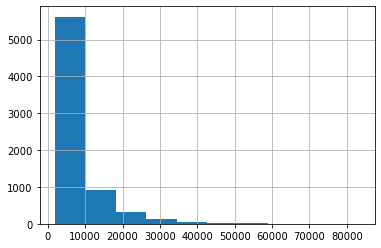

In [1537]:

print('Number of NaNs:', ai_df_['customer lifetime value'].isna().sum())
#print(ai_df_['customer lifetime value'].unique())
print(ai_df_['customer lifetime value'].hist())

mean_customer_lifetime_value = np.mean(ai_df_['customer lifetime value'])

print('mean:',mean_customer_lifetime_value)

AxesSubplot(0.125,0.125;0.775x0.755)
Number of NaNs: 0


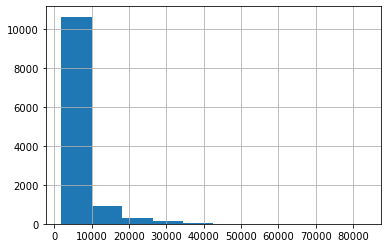

In [1538]:
ai_df_['customer lifetime value'] = ai_df_['customer lifetime value'].fillna(mean_customer_lifetime_value)  #fillna (fill NaN) with mean

print(ai_df_['customer lifetime value'].hist())
print('Number of NaNs:', ai_df_['customer lifetime value'].isna().sum())

### Income <a class="anchor" id="chapter7_2"></a>

Number of NaNs: 2937
AxesSubplot(0.125,0.125;0.775x0.755)
mean: 37828.820291124


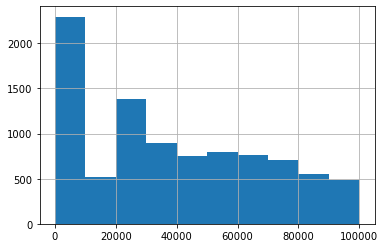

In [1539]:
print('Number of NaNs:', ai_df_['income'].isna().sum())
#print(ai_df_['income'].unique())
print(ai_df_['income'].hist())

mean_income = np.mean(ai_df_['income'])

print('mean:', mean_income)

Number of NaNs: 0
AxesSubplot(0.125,0.125;0.775x0.755)


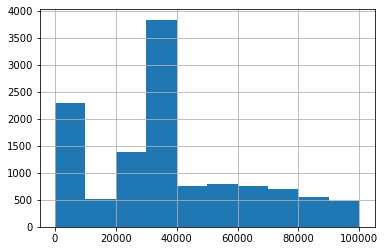

In [1540]:
ai_df_['income'] = ai_df_['income'].fillna(mean_income)

print('Number of NaNs:', ai_df_['income'].isna().sum())
print(ai_df_['income'].hist())

### Monthly premium auto <a class="anchor" id="chapter7_3"></a>

Number of NaNs: 2937
AxesSubplot(0.125,0.125;0.775x0.755)
mean: 110.3912662799606


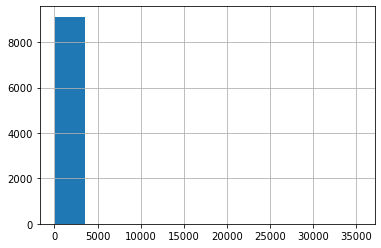

In [1541]:
print('Number of NaNs:', ai_df_['monthly premium auto'].isna().sum())
#print(ai_df_['monthly premium auto'].unique()) 
print(ai_df_['monthly premium auto'].hist())    #outlier: 35353.0

mean_monthly_premium_auto = np.mean(ai_df_['monthly premium auto'])

print('mean:', mean_monthly_premium_auto)

Number of NaNs: 0
AxesSubplot(0.125,0.125;0.775x0.755)


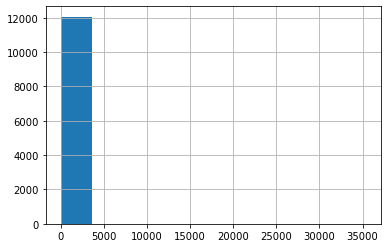

In [1542]:
ai_df_['monthly premium auto'] = ai_df_['monthly premium auto'].fillna(mean_monthly_premium_auto)

print('Number of NaNs:', ai_df_['monthly premium auto'].isna().sum())
print(ai_df_['monthly premium auto'].hist())

### Number of open complaints <a class="anchor" id="chapter7_4"></a>

Number of NaNs: 5004
AxesSubplot(0.125,0.125;0.775x0.755)
mean: 0.384


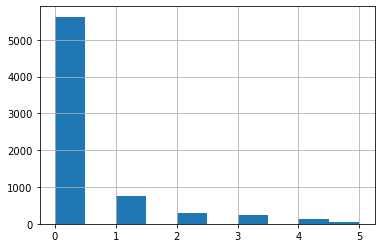

In [1543]:
print('Number of NaNs:', ai_df_['number of open complaints'].isna().sum())
#print(ai_df_['number of open complaints'].unique())
print(ai_df_['number of open complaints'].hist())

mean_number_of_open_complaints = round(np.mean(ai_df_['number of open complaints']), 3)
print('mean:',mean_number_of_open_complaints)

Number of NaNs: 0
AxesSubplot(0.125,0.125;0.775x0.755)


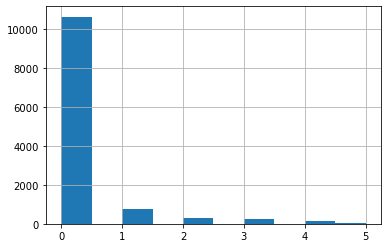

In [1544]:
ai_df_['number of open complaints'] = ai_df_['number of open complaints'].fillna(mean_number_of_open_complaints)

print('Number of NaNs:', ai_df_['number of open complaints'].isna().sum())
print(ai_df_['number of open complaints'].hist())

### Total claim amount <a class="anchor" id="chapter7_5"></a>

Number of NaNs: 2937
AxesSubplot(0.125,0.125;0.775x0.755)
mean: 430.5271400681818


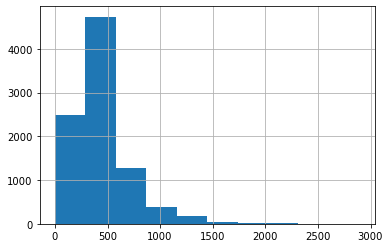

In [1545]:
print('Number of NaNs:', ai_df_['total claim amount'].isna().sum())
#print(ai_df_['total claim amount'].unique())
print(ai_df_['total claim amount'].hist())

mean_total_claim_amount = np.mean(ai_df_['total claim amount'])
print('mean:',mean_total_claim_amount)

Number of NaNs: 0
AxesSubplot(0.125,0.125;0.775x0.755)


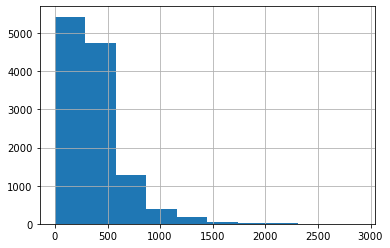

In [1546]:
ai_df_['total claim amount'] = ai_df_['total claim amount'].fillna(mean_monthly_premium_auto)

print('Number of NaNs:', ai_df_['total claim amount'].isna().sum())
print(ai_df_['total claim amount'].hist())

#### Check in complete data for NaN

In [1547]:
ai_df_.isna().sum()   #check for count of NaN values

st                           2937
gender                       3059
education                    2937
customer lifetime value         0
income                          0
monthly premium auto            0
number of open complaints       0
policy type                  2937
vehicle class                2937
total claim amount              0
dtype: int64

In [1548]:
ai_df_.describe()  #check for data stats

,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount
count,12074.000000,12074.000000,12074.000000,12074.000000,12074.000000
mean,8028.803803,37828.820291,110.391266,0.384176,352.654102
std,5312.295534,26409.114946,505.740308,0.700656,286.924004
min,1898.007675,0.000000,61.000000,0.000000,0.099007
25%,5279.143178,21585.250000,71.000000,0.000000,110.391266
50%,8028.803803,37828.820291,101.000000,0.384000,312.000000
75%,8028.803803,53301.750000,110.391266,0.384000,494.345486
max,83325.381190,99981.000000,35354.000000,5.000000,2893.239678


## Bucketing the data<a class="anchor" id="chapter8"></a>
    Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central

<AxesSubplot:>

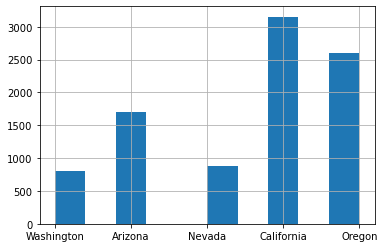

In [1549]:
ai_df_.st.hist() 

In [1550]:
def bucket_st(x):
    if x !=x:                #for NaN values
        return x
    elif x in ['California', 'West Region']:
        return 'West Region'
    elif x in ['Oregon', 'North West']:
        return 'North West'
    elif x in ['Washington', 'East']:
        return 'East'
    elif x in ['Arizona','Nevada', 'Central']:
        return 'Central'
    else:
        return 'Other'
    

In [1551]:
ai_df_['st binned'] = ai_df_['st'].apply(bucket_st)  #apply function on data 'st' to group into 'st binned' (new column)


# sort columns
ai_df_=ai_df_[['st', 'st binned','gender', 'education', 'income', 'policy type', 'vehicle class','customer lifetime value', 'monthly premium auto', 'number of open complaints', 'total claim amount']]
ai_df_

,st,st binned,gender,education,income,policy type,vehicle class,customer lifetime value,monthly premium auto,number of open complaints,total claim amount
0,Washington,East,NaN,Master,0.0,Personal Auto,Four-Door Car,8028.803803,1000.0,0.384,2.704934
1,Arizona,Central,Female,Bachelor,0.0,Personal Auto,Four-Door Car,8028.803803,94.0,0.384,1131.464935
2,Nevada,Central,Female,Bachelor,48767.0,Personal Auto,Two-Door Car,8028.803803,108.0,0.384,566.472247
3,California,West Region,Male,Bachelor,0.0,Corporate Auto,SUV,8028.803803,106.0,0.384,529.881344
4,Washington,East,Male,High School or Below,36357.0,Personal Auto,Four-Door Car,8028.803803,68.0,0.384,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
12069,California,West Region,Male,Bachelor,71941.0,Personal Auto,Four-Door Car,23405.987980,73.0,0.000,198.234764
12070,California,West Region,Female,College,21604.0,Corporate Auto,Four-Door Car,3096.511217,79.0,0.000,379.200000
12071,California,West Region,Male,Bachelor,0.0,Corporate Auto,Four-Door Car,8163.890428,85.0,3.000,790.784983
12072,California,West Region,Male,College,21941.0,Personal Auto,Four-Door Car,7524.442436,96.0,0.000,691.200000


## Standardizing the data<a class="anchor" id="chapter9"></a>
    Use string functions to standardize the text data (lower case)

In [1552]:
ai_df_.dtypes  ##checking which data types are strings

st                            object
st binned                     object
gender                        object
education                     object
income                       float64
policy type                   object
vehicle class                 object
customer lifetime value      float64
monthly premium auto         float64
number of open complaints    float64
total claim amount           float64
dtype: object

In [1553]:
##setting all string data columns lower case

for col in ['st', 'st binned', 'gender','education', 'policy type', 'vehicle class']:
    ai_df_[col]=ai_df_[col].str.lower()


#ai_df_['st']=ai_df_['st'].str.lower()
#ai_df_['st binned'].str.lower().inplace=True
#ai_df_['gender'].str.lower()
#ai_df_['education'].str.lower()
#ai_df_['policy type'].str.lower()
#ai_df_['vehicle class'].str.lower()

ai_df_

,st,st binned,gender,education,income,policy type,vehicle class,customer lifetime value,monthly premium auto,number of open complaints,total claim amount
0,washington,east,NaN,master,0.0,personal auto,four-door car,8028.803803,1000.0,0.384,2.704934
1,arizona,central,female,bachelor,0.0,personal auto,four-door car,8028.803803,94.0,0.384,1131.464935
2,nevada,central,female,bachelor,48767.0,personal auto,two-door car,8028.803803,108.0,0.384,566.472247
3,california,west region,male,bachelor,0.0,corporate auto,suv,8028.803803,106.0,0.384,529.881344
4,washington,east,male,high school or below,36357.0,personal auto,four-door car,8028.803803,68.0,0.384,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
12069,california,west region,male,bachelor,71941.0,personal auto,four-door car,23405.987980,73.0,0.000,198.234764
12070,california,west region,female,college,21604.0,corporate auto,four-door car,3096.511217,79.0,0.000,379.200000
12071,california,west region,male,bachelor,0.0,corporate auto,four-door car,8163.890428,85.0,3.000,790.784983
12072,california,west region,male,college,21941.0,personal auto,four-door car,7524.442436,96.0,0.000,691.200000


## Data types - Numerical or Categorical?<a class="anchor" id="chapter10"></a>

In [1554]:
ai_df_numeric = ai_df_._get_numeric_data()

In [1555]:
list(ai_df_numeric)

['income',
 'customer lifetime value',
 'monthly premium auto',
 'number of open complaints',
 'total claim amount']

In [1556]:
ai_df_categoric = [col for col in ai_df_.columns if ai_df_[col].dtype=="O"]

In [1557]:
list(ai_df_categoric)

['st', 'st binned', 'gender', 'education', 'policy type', 'vehicle class']

## New information on response and sales channel<a class="anchor" id="chapter11"></a>

In [1558]:
new_df_= pd.read_csv('Data\customer_analayiss_case_study_with_response.csv')

In [1559]:
new_df=new_df_.reset_index(drop=True)
new_df

,Unnamed: 0,state,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,total claim amount,vehicle class,sales channel,response
0,0,Arizona,4809.216960,College,M,48029,61,0.0,Corporate Auto,292.800000,Four-Door Car,Agent,No
1,1,California,2228.525238,College,F,0,64,0.0,Personal Auto,744.924331,Four-Door Car,Call Center,No
2,2,Washington,14947.917300,Bachelor,M,22139,100,0.0,Personal Auto,480.000000,SUV,Call Center,No
3,3,Oregon,22332.439460,College,M,49078,97,0.0,Corporate Auto,484.013411,Four-Door Car,Branch,Yes
4,4,Oregon,9025.067525,Bachelor,F,23675,117,NaN,Personal Auto,707.925645,Four-Door Car,Branch,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,Nevada,15563.369440,Bachelor,F,0,253,NaN,Personal Auto,1214.400000,Luxury Car,Web,No
10906,10906,Oregon,5259.444853,College,F,61146,65,0.0,Personal Auto,273.018929,Four-Door Car,Branch,No
10907,10907,Arizona,23893.304100,Bachelor,F,39837,201,0.0,Corporate Auto,381.306996,Luxury SUV,Web,No
10908,10908,California,11971.977650,College,F,64195,158,4.0,Personal Auto,618.288849,SUV,Branch,No


In [1560]:
def drop_columns(new_df) :                  #funtion to drop customer column
    new_df.drop(columns=['Unnamed: 0'], inplace=True)
    return new_df

In [1561]:
new_df=drop_columns(new_df)

In [1562]:
##setting all string data columns lower case

for col in ['state', 'gender','education', 'policy type', 'vehicle class', 'sales channel', 'response']:
    new_df[col]=new_df[col].str.lower()

new_df

,state,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,total claim amount,vehicle class,sales channel,response
0,arizona,4809.216960,college,m,48029,61,0.0,corporate auto,292.800000,four-door car,agent,no
1,california,2228.525238,college,f,0,64,0.0,personal auto,744.924331,four-door car,call center,no
2,washington,14947.917300,bachelor,m,22139,100,0.0,personal auto,480.000000,suv,call center,no
3,oregon,22332.439460,college,m,49078,97,0.0,corporate auto,484.013411,four-door car,branch,yes
4,oregon,9025.067525,bachelor,f,23675,117,NaN,personal auto,707.925645,four-door car,branch,no
...,...,...,...,...,...,...,...,...,...,...,...,...
10905,nevada,15563.369440,bachelor,f,0,253,NaN,personal auto,1214.400000,luxury car,web,no
10906,oregon,5259.444853,college,f,61146,65,0.0,personal auto,273.018929,four-door car,branch,no
10907,arizona,23893.304100,bachelor,f,39837,201,0.0,corporate auto,381.306996,luxury suv,web,no
10908,california,11971.977650,college,f,64195,158,4.0,personal auto,618.288849,suv,branch,no


In [1563]:
new_df.dtypes 

state                         object
customer lifetime value      float64
education                     object
gender                        object
income                         int64
monthly premium auto           int64
number of open complaints    float64
policy type                   object
total claim amount           float64
vehicle class                 object
sales channel                 object
response                      object
dtype: object

## Data Visualization<a class="anchor" id="chapter12"></a>

In [1564]:
# import libraries to visualize

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Plot of the total number of responses <a class="anchor" id="chapter12_1"></a>

[Text(0, 0.5, 'Count of (non)response')]

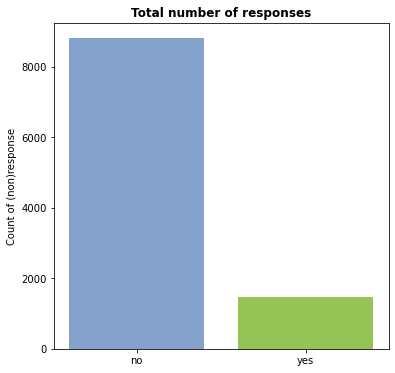

In [1565]:
responded = new_df['response'].value_counts()
palette1 = {"yes": "#96c355", "no": "#85a2cc"}

# create figure and axes
fig1, ax1 = plt.subplots(1,1,figsize = (6,6))

# set title
ax1.set_title('Total number of responses', fontweight='bold')

# plot the bar chart
ax1.bar(responded.index, responded, color=('#85a2cc','#96c355'))

ax1.set(ylabel='Count of (non)response')


C:\Users\ingae\anaconda3\envs\DA_Envi_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='response', ylabel='count'>

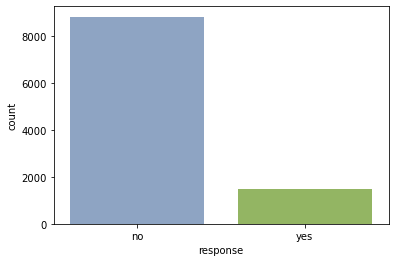

In [1566]:
#sns.countplot(new_df, x='response', palette=palette1, hue='sales channel')

sns.countplot(new_df.response, palette=palette1) ##optional plot

### Plot of the response rate by the sales channel <a class="anchor" id="chapter12_2"></a>

In [1567]:
new_df['response2'] = new_df['response'] #duplicate response column (QUESTION:any possibility to do without?)

channel_response = new_df.groupby(['sales channel','response2'])['response'].count().reset_index()
channel_response

,sales channel,response2,response
0,agent,no,3148
1,agent,yes,742
2,branch,no,2539
3,branch,yes,326
4,call center,no,1792
5,call center,yes,221
6,web,no,1334
7,web,yes,177


<AxesSubplot:title={'center':'Response Rate by sales channel'}, xlabel='sales channel', ylabel='response'>

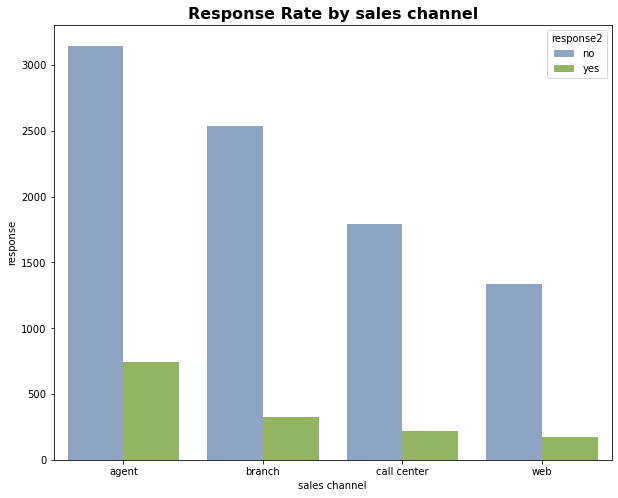

In [1568]:
#set the color palette, which means that a preset palette of colors will be used in the upcoming graphs
palette1 = {"yes": "#96c355", "no": "#85a2cc"}

fig2, ax2 = plt.subplots(figsize = (10,8))
ax2.set_title('Response Rate by sales channel', size='16', fontweight='bold')

sns.barplot(x = channel_response['sales channel'],y = channel_response['response'], hue = channel_response['response2'], ax = ax2, orient='v',palette=palette1)
## hue - adding 3rd dimension (without only one bar per x-value)

C:\Users\ingae\anaconda3\envs\DA_Envi_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


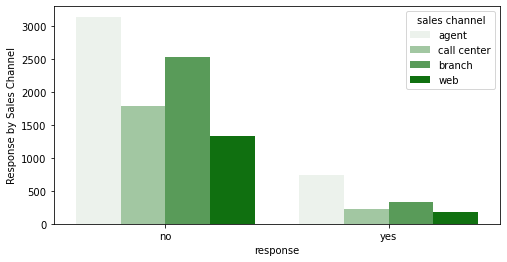

In [1569]:
###other option to do plot response rate by sales channel
plt.figure(figsize=(8,4))
sns.countplot('response', hue='sales channel', data=new_df, color='green')
plt.ylabel('Response by Sales Channel')
plt.show()

### Plot of the response rate by the total claim amount <a class="anchor" id="chapter12_3"></a>

In [1570]:

#response_yes=[new_df[new_df['response'] == 'yes']]  #filtering data for response yes

#distribution plot, rain cloud plot 

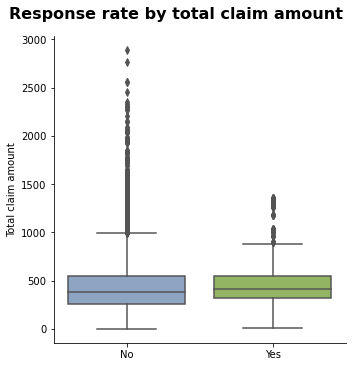

In [1571]:
fg3 = sns.catplot(x='response', y = 'total claim amount', data = new_df,  kind="box", palette=palette1)
fg3.fig.suptitle('Response rate by total claim amount', size='16', fontweight='bold', y = 1.05)
fg3.set_xticklabels(['No', 'Yes'])
fg3.set_ylabels('Total claim amount')
fg3.set_xlabels('')

### Plot of the response rate by income <a class="anchor" id="chapter12_4"></a>

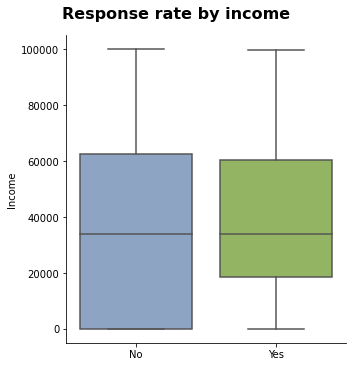

In [1572]:
fg4 = sns.catplot(x='response', y = 'income', data = new_df,  kind="box", palette=palette1)
fg4.fig.suptitle('Response rate by income', size='16', fontweight='bold', y = 1.05)
fg4.set_xticklabels(['No', 'Yes'])
fg4.set_ylabels('Income')
fg4.set_xlabels('')

### Correlation Heatmap <a class="anchor" id="chapter12_5"></a>

<AxesSubplot:>

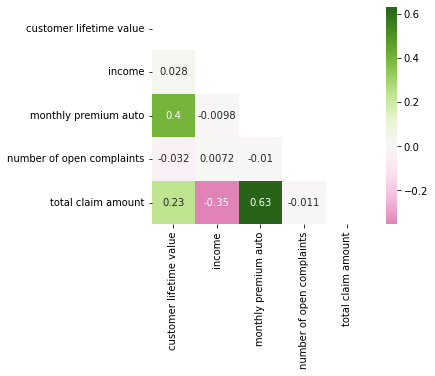

In [1573]:
corr = new_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, cmap="PiYG", mask=mask, square=True, center=0)

In [1574]:

corr.to_csv("heatmap_data.csv")

## Rechecking and sorting numerical and categorical data<a class="anchor" id="chapter13"></a>

In [1575]:
new_df_numeric = new_df._get_numeric_data()
#list(new_df_numeric)
new_df_numeric

,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount
0,4809.216960,48029,61,0.0,292.800000
1,2228.525238,0,64,0.0,744.924331
2,14947.917300,22139,100,0.0,480.000000
3,22332.439460,49078,97,0.0,484.013411
4,9025.067525,23675,117,NaN,707.925645
...,...,...,...,...,...
10905,15563.369440,0,253,NaN,1214.400000
10906,5259.444853,61146,65,0.0,273.018929
10907,23893.304100,39837,201,0.0,381.306996
10908,11971.977650,64195,158,4.0,618.288849


In [1576]:
def drop_columns(new_df_numeric) :                  
    new_df_numeric.drop(columns=['number of open complaints'], inplace=True)
    return new_df_numeric

In [1577]:
drop_columns(new_df_numeric)  ##delete 'number of open complaints' from numeric dataset, as it's ordinal, categorical data

,customer lifetime value,income,monthly premium auto,total claim amount
0,4809.216960,48029,61,292.800000
1,2228.525238,0,64,744.924331
2,14947.917300,22139,100,480.000000
3,22332.439460,49078,97,484.013411
4,9025.067525,23675,117,707.925645
...,...,...,...,...
10905,15563.369440,0,253,1214.400000
10906,5259.444853,61146,65,273.018929
10907,23893.304100,39837,201,381.306996
10908,11971.977650,64195,158,618.288849


In [1578]:
new_df_categoric = [col for col in new_df.columns if new_df[col].dtype=="object"]

new_df_categorical=new_df[new_df_categoric]
new_df_categorical

,state,education,gender,policy type,vehicle class,sales channel,response,response2
0,arizona,college,m,corporate auto,four-door car,agent,no,no
1,california,college,f,personal auto,four-door car,call center,no,no
2,washington,bachelor,m,personal auto,suv,call center,no,no
3,oregon,college,m,corporate auto,four-door car,branch,yes,yes
4,oregon,bachelor,f,personal auto,four-door car,branch,no,no
...,...,...,...,...,...,...,...,...
10905,nevada,bachelor,f,personal auto,luxury car,web,no,no
10906,oregon,college,f,personal auto,four-door car,branch,no,no
10907,arizona,bachelor,f,corporate auto,luxury suv,web,no,no
10908,california,college,f,personal auto,suv,branch,no,no


In [1579]:
new_df_categorical=pd.concat([new_df_categorical, new_df['number of open complaints']], axis = 1)

In [1580]:
new_df_categorical['number of open complaints']=new_df_categorical['number of open complaints'].apply(str)

In [1581]:
new_df_categorical.dtypes

state                        object
education                    object
gender                       object
policy type                  object
vehicle class                object
sales channel                object
response                     object
response2                    object
number of open complaints    object
dtype: object

In [1582]:
print(new_df['number of open complaints'].unique()) 

[ 0. nan  3.  1.  2.  4.  5.]


In [1583]:
#funtion to drop 'response 2' column
def drop_columns(new_df_categorical) :                  
    new_df_categorical.drop(columns=['response2'], inplace=True)
    return new_df_categorical

In [1584]:
drop_columns(new_df_categorical) 

,state,education,gender,policy type,vehicle class,sales channel,response,number of open complaints
0,arizona,college,m,corporate auto,four-door car,agent,no,0.0
1,california,college,f,personal auto,four-door car,call center,no,0.0
2,washington,bachelor,m,personal auto,suv,call center,no,0.0
3,oregon,college,m,corporate auto,four-door car,branch,yes,0.0
4,oregon,bachelor,f,personal auto,four-door car,branch,no,nan
...,...,...,...,...,...,...,...,...
10905,nevada,bachelor,f,personal auto,luxury car,web,no,nan
10906,oregon,college,f,personal auto,four-door car,branch,no,0.0
10907,arizona,bachelor,f,corporate auto,luxury suv,web,no,0.0
10908,california,college,f,personal auto,suv,branch,no,4.0


In [1585]:
new_df_numeric

,customer lifetime value,income,monthly premium auto,total claim amount
0,4809.216960,48029,61,292.800000
1,2228.525238,0,64,744.924331
2,14947.917300,22139,100,480.000000
3,22332.439460,49078,97,484.013411
4,9025.067525,23675,117,707.925645
...,...,...,...,...
10905,15563.369440,0,253,1214.400000
10906,5259.444853,61146,65,273.018929
10907,23893.304100,39837,201,381.306996
10908,11971.977650,64195,158,618.288849


## Checking for normal distribution<a class="anchor" id="chapter14"></a>

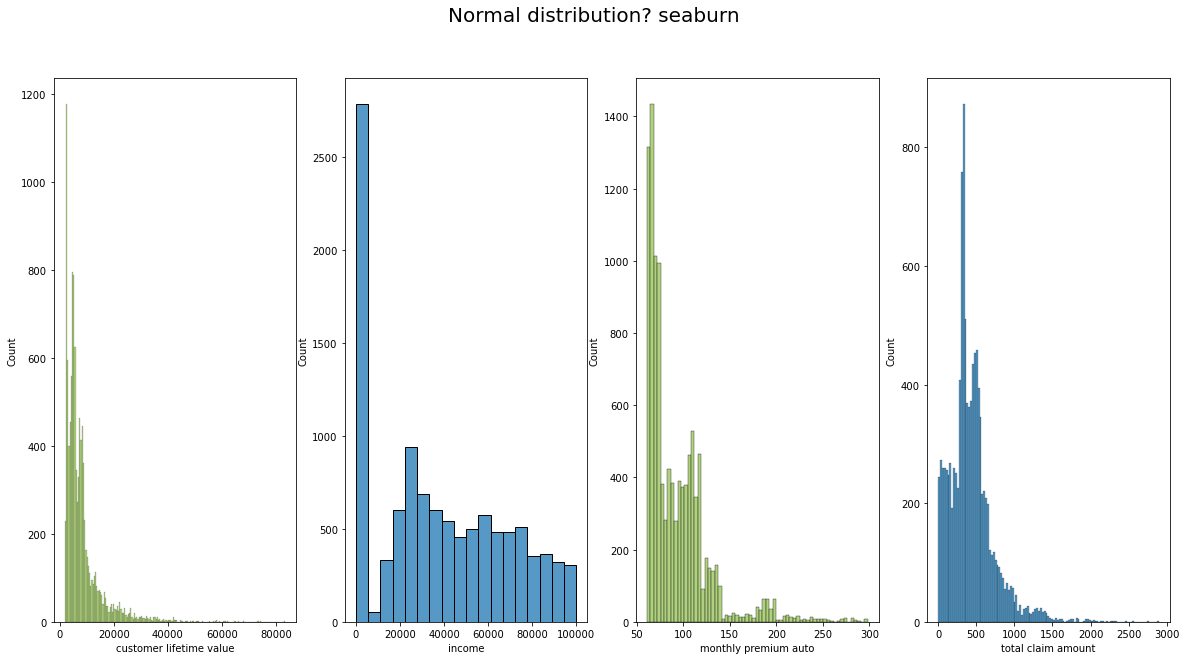

In [1586]:
# create the figure and axes
fig5,axes5 = plt.subplots(1,4,figsize = (20,10))


fig5.suptitle('Normal distribution? seaburn', fontsize=20)

# use sns.histplot as distplot will replaced
fg5 = sns.histplot(new_df_numeric['customer lifetime value'], ax=axes5[0], color="#96c355")
fg5 = sns.histplot(new_df_numeric['income'], ax=axes5[1])
fg5 = sns.histplot(new_df_numeric['monthly premium auto'], ax=axes5[2], color="#96c355")
#fg5 = sns.histplot(new_df_numeric['number of open complaints'], ax=axes5[1,0])
fg5 = sns.histplot(new_df_numeric['total claim amount'], ax=axes5[3])

Text(0.5, 1.0, 'Histogram of customer lifetime value')

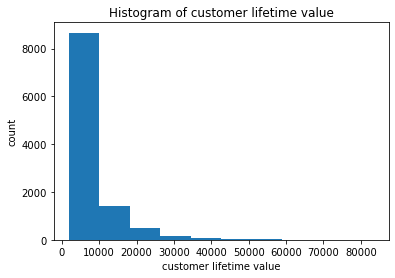

In [1587]:
# use matplotlib.pyplot.hist      (QUESTION: Is there a way of also displaying plt.histo on a canvas (as above)?)
fig6=plt.hist(new_df_numeric['customer lifetime value'], label='customer lifetime value')
plt.xlabel('customer lifetime value')
plt.ylabel('count')
plt.title('Histogram of customer lifetime value')

Text(0.5, 1.0, 'Histogram of income')

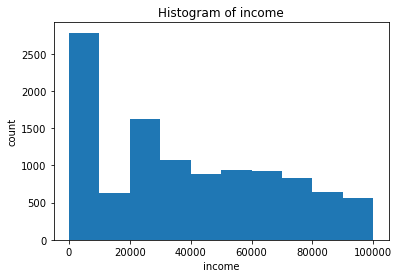

In [1588]:
fig7 = plt.hist(new_df_numeric['income'], label='income')
plt.xlabel('income')
plt.ylabel('count')
plt.title('Histogram of income')

Text(0.5, 1.0, 'Histogram of monthly premium auto')

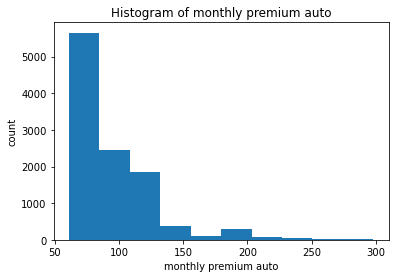

In [1589]:
fig8 = plt.hist(new_df_numeric['monthly premium auto'], label='monthly premium auto')
plt.xlabel('monthly premium auto')
plt.ylabel('count')
plt.title('Histogram of monthly premium auto')

Text(0.5, 1.0, 'Histogram of total claim amount')

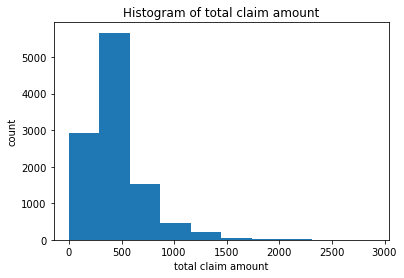

In [1590]:
fig10 = plt.hist(new_df_numeric['total claim amount'], label='total claim amount')
plt.xlabel('total claim amount')
plt.ylabel('count')
plt.title('Histogram of total claim amount')

## Multicollinearity<a class="anchor" id="chapter15"></a>

- increasing Multicollinearity leads to:
    + instability of the models estimation of regression coefficiants
    + hence the asseritions of the regression coefficient will be increasingly inaccurate
    + an unambiguous model interpretation      

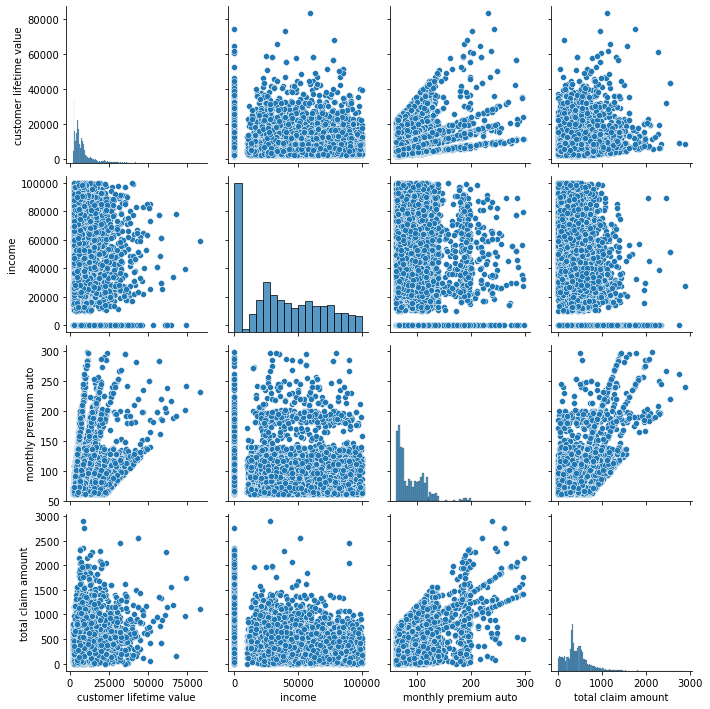

In [1591]:
sns.pairplot(new_df_numeric) 

In [1592]:
#funtion to drop 'total claim amount' column as propable colinearity to 'monthly premium auto'

#def drop_columns(new_df_numeric) :                  
    #new_df_numeric.drop(columns=['monthly premium auto'], inplace=True)
    #return new_df_numeric

In [1593]:
#new_df_numeric_mpa=drop_columns(new_df_numeric)   #why deletion also on new_df or without inplace=True, not at all

In [1594]:
#new_df_numeric_mpa

### Seaburn Heatmap without 'monthly premium auto' column

In [1595]:
#sns.heatmap(new_df_numeric_mpa.corr(), annot=True, cmap="PiYG")  

#corr = new_df_numeric_mpa.corr()
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True
#sns.heatmap(corr, annot=True, cmap="PiYG", mask=mask, square=True)

import IPython
url = "https://c.tenor.com/wT6b-wB22RYAAAAC/dave-grohl-wine.gif"
#src= "Data/dave-grohl-wine.gif"
iframe = '<iframe src=' + url + ' width=260 height=200></iframe>'
IPython.display.HTML(iframe)

### Highly Correlated Columns<a class="anchor" id="chapter15_1"></a>

In [1596]:
corr_matrix=new_df.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.60)] ##should be 0.8

['total claim amount']

## Data Transformation<a class="anchor" id="chapter16"></a>

### Hot coding Categorical Variables<a class="anchor" id="chapter16_1"></a>

In [1597]:
# get dummies pandas (create needed new column(names))
categoricals_features=pd.get_dummies(new_df_categorical, drop_first=True)


#pd.DataFrame(OneHotEncoder(drop='first').fit_transform(new_df_categoric).toarray(),
#columns=OneHotEncoder(drop='first').fit(new_df_categoric).get_feature_names(input_features=new_df_categoric.columns)).head()

In [1598]:
categoricals_features

,state_california,state_nevada,state_oregon,state_washington,education_college,education_doctor,education_high school or below,education_master,gender_m,policy type_personal auto,...,sales channel_branch,sales channel_call center,sales channel_web,response_yes,number of open complaints_1.0,number of open complaints_2.0,number of open complaints_3.0,number of open complaints_4.0,number of open complaints_5.0,number of open complaints_nan
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
10906,0,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
10907,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10908,1,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0


### Predictive Modeling: X Y split<a class="anchor" id="chapter16_2"></a>

X Y-split to seperate independent from dependent data

In [1599]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae


In [1600]:
new_df_numeric

,customer lifetime value,income,monthly premium auto,total claim amount
0,4809.216960,48029,61,292.800000
1,2228.525238,0,64,744.924331
2,14947.917300,22139,100,480.000000
3,22332.439460,49078,97,484.013411
4,9025.067525,23675,117,707.925645
...,...,...,...,...
10905,15563.369440,0,253,1214.400000
10906,5259.444853,61146,65,273.018929
10907,23893.304100,39837,201,381.306996
10908,11971.977650,64195,158,618.288849


In [1601]:
X=new_df_numeric.drop('total claim amount', axis=1) #independent/explanatory variables
y=new_df_numeric['total claim amount']   #target/dependend/explained variable (which shell be predicted)

In [1602]:
X=X._get_numeric_data()
X

,customer lifetime value,income,monthly premium auto
0,4809.216960,48029,61
1,2228.525238,0,64
2,14947.917300,22139,100
3,22332.439460,49078,97
4,9025.067525,23675,117
...,...,...,...
10905,15563.369440,0,253
10906,5259.444853,61146,65
10907,23893.304100,39837,201
10908,11971.977650,64195,158


array([[<AxesSubplot:title={'center':'customer lifetime value'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'monthly premium auto'}>,
        <AxesSubplot:>]], dtype=object)

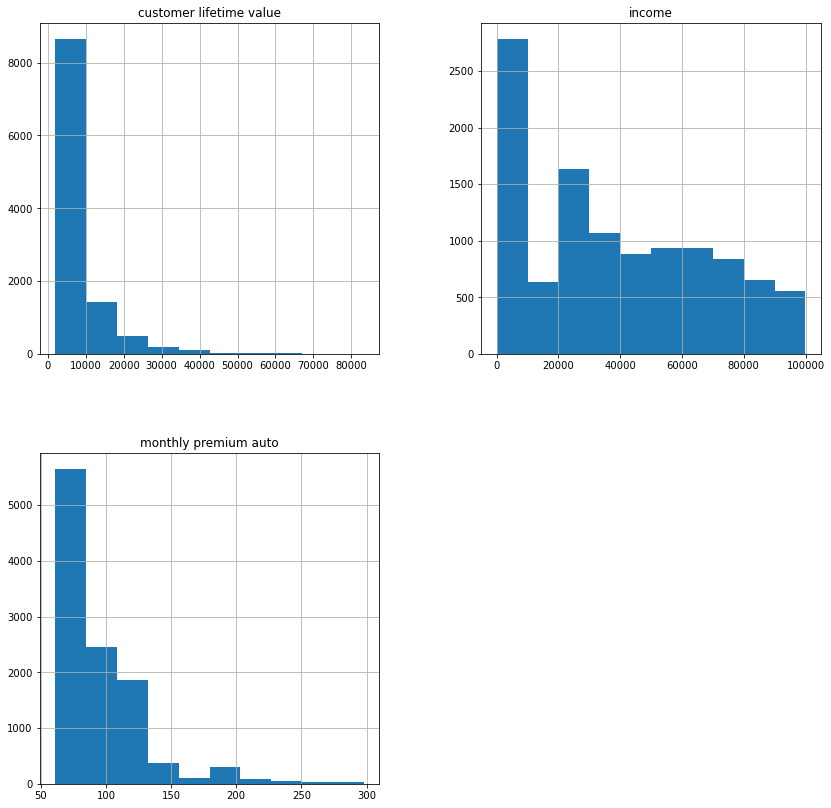

In [1603]:
X.hist(figsize=(14,14))

### Data Splitting <a class="anchor" id="chapter16_3"></a>

In [1604]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20, random_state=66)  #test_set ca. 20% of whole data

In [1605]:
X_train

,customer lifetime value,income,monthly premium auto
8793,8383.677045,68717,70
2522,3837.492458,36794,99
6745,7462.926263,70263,93
7714,11378.887110,34854,95
4408,9152.489511,60423,114
...,...,...,...
1741,3538.059456,0,67
8243,7449.855125,0,206
8823,6689.022728,56980,84
9020,9220.013197,0,136


## Standardize - using StandardScaler<a class="anchor" id="chapter17"></a>

In [1606]:
std_scaler=StandardScaler().fit(X_train)

X_train_scaled=std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

In [1607]:
X_train_scaled

array([[ 0.04745631,  1.02812479, -0.67229798],
       [-0.60576675, -0.02651469,  0.17054947],
       [-0.08484268,  1.07919996, -0.00383276],
       ...,
       [-0.19604178,  0.64036977, -0.26540611],
       [ 0.16762611, -1.24207729,  1.24590656],
       [-0.71203355, -1.24207729, -0.12008758]])

In [1608]:
X_test_scaled

array([[ 0.06277438, -0.29467585, -0.43978834],
       [ 0.68596114, -1.24207729,  0.69369617],
       [-0.79919331, -0.03189972, -0.90480762],
       ...,
       [-0.39306625,  1.20569855, -0.75948909],
       [-0.03431144,  0.47492058, -0.7885528 ],
       [ 0.11115008, -0.30174576,  0.57744134]])

### Apply Linear Regression<a class="anchor" id="chapter17_1"></a>

In [1609]:
 sum(np.isnan(X_train_scaled))

array([0, 0, 0])

#### Model fitting

In [1610]:
model=LinearRegression()    # model, doesnt work if NaN values in any of the columns
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

#### Model parameters

In [1611]:
model.coef_

array([  -5.31333037, -100.59857895,  187.20125503])

In [1612]:
model.intercept_

435.2285021207607

In [1613]:
model.score(X_test_scaled,y_test)

0.5179883041411787

#### Model prediction

In [1614]:
y_pred=model.predict(X_test_scaled)   # model prediction
##y_pred_train=model.predict(X_train)

In [1615]:
y_test

436     131.515739
3606    842.400000
8172     67.530904
4968    712.800000
9672     46.702524
           ...    
1313    660.136987
6177    446.400000
1837    321.600000
9201    316.800000
8941    324.317667
Name: total claim amount, Length: 2182, dtype: float64

In [1616]:
y_pred

array([382.21000376, 686.3957668 , 273.30282424, ..., 173.84812075,
       240.01640132, 573.090864  ])

In [1617]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

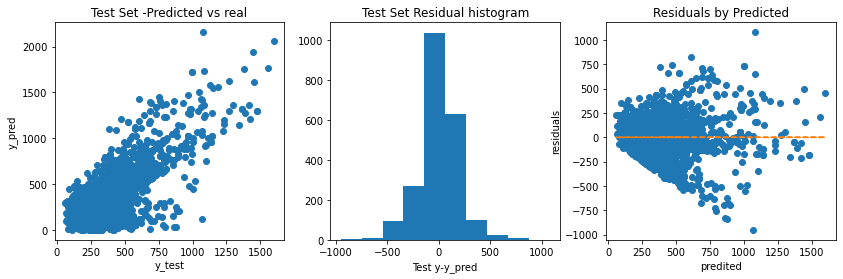

In [1618]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')


## Evaluating predictions<a class="anchor" id="chapter17_2"></a>

In [1619]:
# mean absolute error
print('The mean absolute error (MAE) of the model is: ',mae(y_test, y_pred))

The mean absolute error (MAE) of the model is:  144.06485596530382


In [1620]:
# mean squared error
print('The mean square error (MSE) of the model is: ',mse(y_test, y_pred))

The mean square error (MSE) of the model is:  38778.22869799966


In [1621]:
# root mean squared error
rms = np.sqrt(mse(y_test, y_pred))
print('The mean root square error (RMSE) of the model is: ', rms)

The mean root square error (RMSE) of the model is:  196.92188476144457


In [1622]:
# R2 score
print('The coefficient of determination (R^2) of the model is: ',r2_score(y_test, y_pred))

The coefficient of determination (R^2) of the model is:  0.5179883041411787


In [1623]:
Adj_R2= 1 - (1-(r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('The adjusted coefficient of determination (Adj_R^2) of the model is: ',Adj_R2)

The adjusted coefficient of determination (Adj_R^2) of the model is:  0.5187017866537699


### Feature Importance

In [1624]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [1625]:
features_importances

,Attribute,Importance
2,monthly premium auto,187.201255
0,customer lifetime value,-5.313330
1,income,-100.598579


## Standardize - using MinMaxScaler<a class="anchor" id="chapter18"></a>

In [1626]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

X_train_scaled2=min_max_scaler.fit_transform(X_train)
X_test_scaled2=min_max_scaler.transform(X_test)

#scaled = scaler.fit_transform(data)
#print(scaled)

In [1627]:
print(X_train_scaled2)
print(X_test_scaled2)

[[0.0796421  0.68730059 0.03797468]
 [0.02381048 0.36800992 0.16033755]
 [0.06833438 0.70276353 0.1350211 ]
 ...
 [0.05883008 0.56990828 0.09704641]
 [0.08991313 0.         0.3164557 ]
 [0.01472775 0.         0.11814346]]
[[0.08095135 0.2868245  0.07172996]
 [0.13421574 0.         0.23628692]
 [0.00727812 0.36637961 0.00421941]
 ...
 [0.0419902  0.7410608  0.02531646]
 [0.07265333 0.51981877 0.02109705]
 [0.08508607 0.28468409 0.21940928]]


### Apply Linear Regression<a class="anchor" id="chapter18_1"></a>

#### Model fitting

In [1628]:
model2=LinearRegression()    # model, doesnt work if NaN values in any of the columns
model2.fit(X_train_scaled2, y_train)   # model train

LinearRegression()

In [1629]:
model2.coef_

array([ -62.16530749, -332.28416637, 1289.46061476])

In [1630]:
model2.intercept_

390.0566527627103

In [1631]:
model2.score(X_test_scaled2,y_test)

0.5179883041411787

#### Model Prediction

In [1632]:
y_pred2=model.predict(X_test_scaled2)   # model prediction

In [1633]:
y_test

436     131.515739
3606    842.400000
8172     67.530904
4968    712.800000
9672     46.702524
           ...    
1313    660.136987
6177    446.400000
1837    321.600000
9201    316.800000
8941    324.317667
Name: total claim amount, Length: 2182, dtype: float64

In [1634]:
y_pred2

array([419.37218219, 478.74857748, 399.12244144, ..., 365.19500303,
       386.4988354 , 447.2112899 ])

In [1635]:
result2=pd.DataFrame({"y_test":y_test,"y_pred":y_pred2})

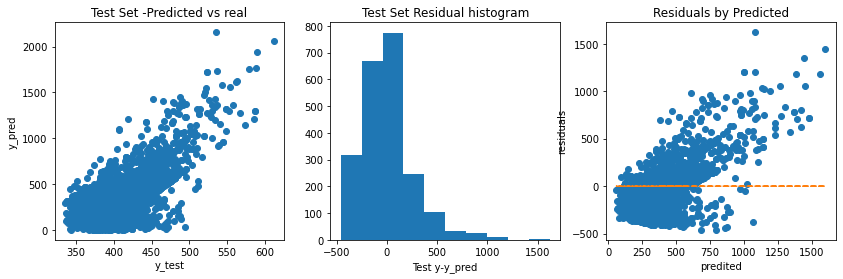

In [1636]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred2, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")


ax[1].hist(y_test - y_pred2)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred2,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred2)),linestyle='dashed')

### Evaluating predictions<a class="anchor" id="chapter18_2"></a>

In [1637]:
# mean absolute error
print('The mean absolute error (MAE) of the model is: ',mae(y_test, y_pred2))

The mean absolute error (MAE) of the model is:  185.3086465960793


In [1638]:
# mean squared error
print('The mean square error (MSE) of the model is: ',mse(y_test, y_pred2))

The mean square error (MSE) of the model is:  66456.49019358655


In [1639]:
# root mean squared error
rms2 = np.sqrt(mse(y_test, y_pred2))
print('The mean root square error (RMSE) of the model is: ', rms2)

The mean root square error (RMSE) of the model is:  257.7915634647235


In [1640]:
# R2 score
print('The coefficient of determination (R^2) of the model is: ',r2_score(y_test, y_pred2))

The coefficient of determination (R^2) of the model is:  0.17394871775852505


In [1641]:
Adj_R2= 1 - (1-(r2_score(y_test, y_pred2))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('The adjusted coefficient of determination (Adj_R^2) of the model is: ',Adj_R2)

The adjusted coefficient of determination (Adj_R^2) of the model is:  0.17418831654331646


#### Feature Importance

In [1642]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model2.coef_
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [1643]:
features_importances

,Attribute,Importance
2,monthly premium auto,1289.460615
0,customer lifetime value,-62.165307
1,income,-332.284166


## Standardize - using RobustScaler<a class="anchor" id="chapter19"></a>

In [1644]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler().fit(X_train)

X_train_scaled3=robust_scaler.transform(X_train)
X_test_scaled3=robust_scaler.transform(X_test)

#scaled = scaler.fit_transform(data)
#print(scaled)

In [1645]:
print(X_train_scaled3)
print(X_test_scaled3)

[[ 0.52470402  0.56105353 -0.31707317]
 [-0.38359304  0.04664972  0.3902439 ]
 [ 0.34074421  0.5859656   0.24390244]
 ...
 [ 0.1861235   0.37192476  0.02439024]
 [ 0.69179835 -0.54624486  1.29268293]
 [-0.53135546 -0.54624486  0.14634146]]
[[ 0.54600357 -0.08414675 -0.12195122]
 [ 1.41253558 -0.54624486  0.82926829]
 [-0.65254982  0.04402316 -0.51219512]
 ...
 [-0.08783612  0.6476657  -0.3902439 ]
 [ 0.41100717  0.29122639 -0.41463415]
 [ 0.61326927 -0.08759512  0.73170732]]


### Apply Linear Regression<a class="anchor" id="chapter18_1"></a>

#### Model fitting

In [1646]:
model3=LinearRegression()    # model, doesnt work if NaN values in any of the columns
model3.fit(X_train_scaled3, y_train)   # model train

LinearRegression()

In [1647]:
model3.coef_

array([  -3.82120577, -206.24892597,  223.07124559])

In [1648]:
model3.intercept_

394.14502952570285

In [1649]:
model3.score(X_test_scaled3,y_test)

0.5179883041411787

#### Model Prediction

In [1650]:
y_pred3=model3.predict(X_test_scaled3)  # model prediction

In [1651]:
y_test

436     131.515739
3606    842.400000
8172     67.530904
4968    712.800000
9672     46.702524
           ...    
1313    660.136987
6177    446.400000
1837    321.600000
9201    316.800000
8941    324.317667
Name: total claim amount, Length: 2182, dtype: float64

In [1652]:
y_pred3

array([382.21000376, 686.3957668 , 273.30282424, ..., 173.84812075,
       240.01640132, 573.090864  ])

In [1653]:
result3=pd.DataFrame({"y_test":y_test,"y_pred":y_pred3})

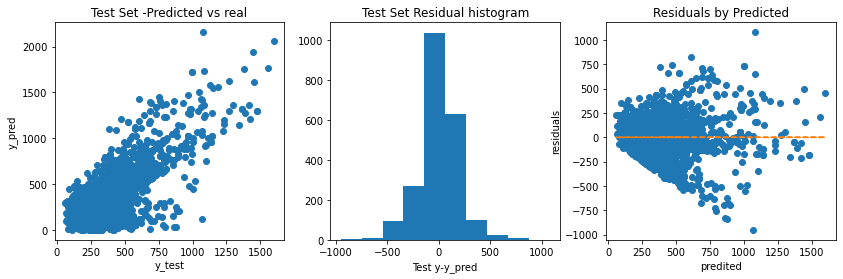

In [1654]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred3, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")


ax[1].hist(y_test - y_pred3)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred3,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred3)),linestyle='dashed')

### Evaluating predictions<a class="anchor" id="chapter18_2"></a>

In [1655]:
# mean absolute error
print('The mean absolute error (MAE) of the model is: ',mae(y_test, y_pred3))

The mean absolute error (MAE) of the model is:  144.06485596530382


In [1656]:
# mean squared error
print('The mean square error (MSE) of the model is: ',mse(y_test, y_pred3))

The mean square error (MSE) of the model is:  38778.22869799966


In [1657]:
# root mean squared error
rms3 = np.sqrt(mse(y_test, y_pred3))
print('The mean root square error (RMSE) of the model is: ', rms3)

The mean root square error (RMSE) of the model is:  196.92188476144457


In [1658]:
# R2 score
print('The coefficient of determination (R^2) of the model is: ', r2_score(y_test, y_pred3))

The coefficient of determination (R^2) of the model is:  0.5179883041411787


In [1659]:
Adj_R2= 1 - (1-(r2_score(y_test, y_pred3))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('The adjusted coefficient of determination (Adj_R^2) of the model is: ',Adj_R2)

The adjusted coefficient of determination (Adj_R^2) of the model is:  0.5187017866537699


### Feature Importance

In [1660]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model3.coef_
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [1661]:
features_importances

,Attribute,Importance
2,monthly premium auto,223.071246
0,customer lifetime value,-3.821206
1,income,-206.248926


## Using Statsmodels for linear regression mode<a class="anchor" id="chapter19"></a>
- on StandardScaled Data

In [1662]:
import statsmodels.api as sm

In [1667]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total claim amount   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     3161.
Date:                Wed, 10 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:48:34   Log-Likelihood:                -58788.
No. Observations:                8728   AIC:                         1.176e+05
Df Residuals:                    8724   BIC:                         1.176e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        435.2285      2.181    199.580      0.0

## Using Seaborn for linear regression model<a class="anchor" id="chapter20"></a>

In [1473]:
y_test

4070     345.600000
7985     527.421579
8660     340.800000
5877     340.800000
10743    363.029680
            ...    
3590     199.551735
5105     599.000883
4836     210.100003
4652     362.743231
1535     369.818708
Name: total claim amount, Length: 2182, dtype: float64

In [1474]:
#y_pred.tolist()

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

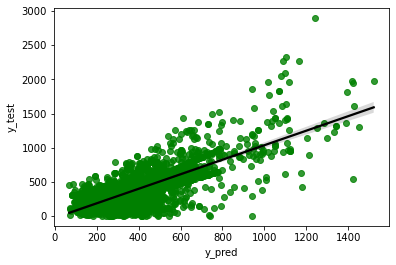

In [1475]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "green"}, line_kws={"color": "black"})